1.  이미지 감정 인식
https://github.com/sunsmiling/facial-emotion-detector


2. 영상 실시간 감정 인식
https://jusonn.github.io/blog/2018/02/16/real-time-emotion-detection/



출처: https://icandooit.tistory.com/95 [i can do "IT"]

# kaggle 

- (0=Angry 화남, 1=Disgust역겨움, 2=Fear두려움, 3=Happy행복, 4=Sad슬픔, 5=Surprise놀람, 6=Neutral무표정).

If you use this dataset in your research work, please cite

"Challenges in Representation Learning: A report on three machine learning
contests." I Goodfellow, D Erhan, PL Carrier, A Courville, M Mirza, B
Hamner, W Cukierski, Y Tang, DH Lee, Y Zhou, C Ramaiah, F Feng, R Li,
X Wang, D Athanasakis, J Shawe-Taylor, M Milakov, J Park, R Ionescu,
M Popescu, C Grozea, J Bergstra, J Xie, L Romaszko, B Xu, Z Chuang, and
Y. Bengio. arXiv 2013.

See fer2013.bib for a bibtex entry.


In [ ]:
"""
A Pylearn2 Dataset class for accessing the data for the
facial expression recognition Kaggle contest for the ICML
2013 workshop on representation learning.
"""
__authors__ = "Ian Goodfellow"
__copyright__ = "Copyright 2013, Universite de Montreal"
__credits__ = ["Ian Goodfellow"]
__license__ = "3-clause BSD"
__maintainer__ = "LISA Lab"

import csv
import numpy as np
import os

from pylearn.datasets.dense_design_matrix import DefaultViewConverter
from pylearn.datasets.dense_design_matrix import DenseDesignMatrix
from pylearn.utils.string_utils import preprocess

class EmotionsDataset(DenseDesignMatrix):
    """
    A Pylearn2 Dataset class for accessing the data for the
    facial expression recognition Kaggle contest for the ICML
    2013 workshop on representation learning.
    """

    def __init__(self, which_set,
            base_path = '${PYLEARN2_DATA_PATH}/icml_2013_emotions',
            start = None,
            stop = None,
            preprocessor = None,
            fit_preprocessor = False,
            axes = ('b', 0, 1, 'c'),
            fit_test_preprocessor = False):
        """
        which_set: A string specifying which portion of the dataset
            to load. Valid values are 'train' or 'public_test'
        base_path: The directory containing the .csv files from kaggle.com.
                This directory should be writable; if the .csv files haven't
                already been converted to npy, this class will convert them
                to save memory the next time they are loaded.
        fit_preprocessor: True if the preprocessor is allowed to fit the
                   data.
        fit_test_preprocessor: If we construct a test set based on this
                    dataset, should it be allowed to fit the test set?
        """

        self.test_args = locals()
        self.test_args['which_set'] = 'public_test'
        self.test_args['fit_preprocessor'] = fit_test_preprocessor
        del self.test_args['start']
        del self.test_args['stop']
        del self.test_args['self']
        del self.test_args['__class__']

        files = {'train': 'train.csv', 'public_test' : 'test.csv'}

        try:
            filename = files[which_set]
        except KeyError:
            raise ValueError("Unrecognized dataset name: " + which_set)

        path = base_path + '/' + filename

        path = preprocess(path)

        X, y = self._load_data(path, which_set == 'train')


        if start is not None:
            assert which_set != 'test'
            assert isinstance(start, int)
            assert isinstance(stop, int)
            assert start >= 0
            assert start < stop
            assert stop <= X.shape[0]
            X = X[start:stop, :]
            if y is not None:
                y = y[start:stop, :]

        view_converter = DefaultViewConverter(shape=[48,48,1], axes=axes)

        if y is None:
            y_labels = None
        else:
            y_labels = 7
        super(EmotionsDataset, self).__init__(X=X, y=y, y_labels=y_labels, view_converter=view_converter)

        if preprocessor:
            preprocessor.apply(self, can_fit=fit_preprocessor)

    def adjust_for_viewer(self, X):
        return (X - 127.5) / 127.5

    def get_test_set(self):
        return EmotionsDataset(**self.test_args)

    def _load_data(self, path, expect_labels):

        assert path.endswith('.csv')

        # If a previous call to this method has already converted
        # the data to numpy format, load the numpy directly
        X_path = path[:-4] + '.X.npy'
        Y_path = path[:-4] + '.Y.npy'
        if os.path.exists(X_path):
            X = np.load(X_path)
            if expect_labels:
                y = np.load(Y_path)
            else:
                y = None
            return X, y

        # Convert the .csv file to numpy
        csv_file = open(path, 'r')

        reader = csv.reader(csv_file)

        # Discard header
        row = next(reader)

        y_list = []
        X_list = []

        for row in reader:
            if expect_labels:
                y_str, X_row_str = (row[0], row[1])
                y = int(y_str)
                y_list.append([y])
            else:
                X_row_str = row[1]
            X_row_strs = X_row_str.split(' ')
            X_row = [float(x) for x in X_row_strs]
            X_list.append(X_row)

        X = np.asarray(X_list).astype('float32')
        if expect_labels:
            y = np.asarray(y_list)
        else:
            y = None

        np.save(X_path, X)
        if y is not None:
            np.save(Y_path, y)

        return X, y


# csv to jpg


## 1)

In [ ]:
import os
import sys
import cv2
import numpy as np



In [ ]:
def main():
    if len(sys.argv) < 2:
        print('Usage: python cv_to_img.py [output_path]')
    return -1

output_path = sys.argv[1]

if os.path.exists(output_path):

    os.system('rm -rf {}'.format(output_path))

os.system('mkdir {}'.format(output_path))

label_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
#data = pd.read_csv('fer2013.csv', delimiter=',')
data = np.genfromtxt('fer2013.csv',delimiter=',',dtype=None)

labels = data[1:,0].astype(np.int32)
image_buffer = data[1:,1]
images = np.array([np.fromstring(image, np.uint8, sep=' ') for image in image_buffer])
usage = data[1:,2]
dataset = zip(labels, images, usage)
for i, d in enumerate(dataset):
    usage_path = os.path.join(output_path, d[-1])
    label_path = os.path.join(usage_path, label_names[d[0]])
    img = d[1].reshape((48,48))
    img_name = '%08d.jpg' % i
    img_path = os.path.join(label_path, img_name)
    if not os.path.exists(usage_path):
        os.system('mkdir {}'.format(usage_path))
    if not os.path.exists(label_path):
        os.system('mkdir {}'.format(label_path))
    cv2.imwrite(img_path, img)
    print ('Write {}'.format(img_path))



In [ ]:
if __name__ == '__main__':
    main()

## 2)

In [ ]:
$mkdir fer_images

fer_data=pd.read_csv('fer2013/fer2013.csv',delimiter=',')

def save_fer_img():

for index,row in fer_data.iterrows():
pixels=np.asarray(list(row['pixels'].split(' ')),dtype=np.uint8)
img=pixels.reshape((48,48))
pathname=os.path.join('fer_images',str(index)+'.jpg')
cv2.imwrite(pathname,img)
print('image saved ias {}'.format(pathname))



# start

## 실시간 영상 처리 

##https://www.youtube.com/watch?v=DtBu1u5aBsc

In [ ]:
import sys
import os
import tensorflow
import keras
import numpy
import pandas as pd
import numpy as np

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils

from keras.layers import MaxPooling2D

In [ ]:
df = pd.read_csv('fer2013.csv')

print(df.info())

In [ ]:
 print(df.head())
    
print(df['Usage'].value_counts)

In [ ]:
X_train,train_y,X_test,test_y = [],[],[],[]

In [ ]:
for index,row in df.iterrows():
    val = row['pixels'].split(".")
    try:
        if 'Training' in row['Usage']:
            X_train.append(np.array(val,'float32'))
            train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
            X_test.append(np.array(val,'float32'))
            test_y.append(row['emotion'])
    except:
        print('error occured at index:{index} and ros:{row}')
print(f"X_train sample data:{X_train[0:2]}")
print(f"train_y sample data:{train_y[0:2]}")
print(f"X_teste sample data:{X_test[0:2]}")
print(f"test_y sample data:{test_y[0:2]}")

In [ ]:
X_train = np.array(X_train,'float32')
train_y = np.array(train_y , 'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

#  이미지 처리  1
-https://github.com/neha01/Realtime-Emotion-Detection/blob/master/emotion_recognition.py#L31

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
from keras.losses import categorical_crossentropy
import pandas as pd
import numpy as np
from keras.optimizers import Adam

# batch_size = 32



In [ ]:
df = pd.read_csv('fer2013.csv')


In [ ]:
print(df.head())

## TRAIN TEST 나누기 

In [ ]:
X_train,y_train,X_test,y_test=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
            X_train.append(np.array(val,'float32'))
            y_train.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
            X_test.append(np.array(val,'float32'))
            y_test.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")


In [ ]:
df.emotion

In [ ]:
print(type(X_train))

In [ ]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 30
width, height = 48, 48

In [ ]:
X_train = np.array(X_train,'float32')
y_train = np.array(y_train,'float32')
X_test = np.array(X_test,'float32')
y_test = np.array(y_test,'float32')

## 'y' one hot encoding

In [ ]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, num_classes = num_labels)
y_test = np_utils.to_categorical(y_test,num_classes = num_labels)

## 0~1 normalization

In [ ]:
#평균 빼주고  표준편차로 나눠주기

X_train -=np.mean(X_train,axis = 0)
y_train /=np.std(y_train,axis = 0)

X_test -=np.mean(X_test,axis =0)
y_test /=np.std(y_train,axis =0)


In [ ]:
print(X_test.shape[0])

In [ ]:
X_train = X_train.reshape(X_train.shape[0],48,48,1)

X_test = X_test.reshape(X_test.shape[0],48,48,1)

In [ ]:
print(f"shape:{X_train.shape}")
print(f"shape:{y_train.shape}")


print(f"shape:{X_test.shape}")
print(f"shape:{y_test.shape}")


## 모델생성

### 1st LAYER

In [ ]:

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
          
model.add(MaxPooling2D(pool_size =(2,2),strides =(2,2)))
model.add(Dropout(0.5))

### 2nd LAYER

In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

### 3rd LAYER

In [ ]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

In [ ]:
model.add(Flatten())

## Fully connected

In [ ]:
model.add(Dense(1024,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1024,activation ='relu'))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(num_labels, activation = 'softmax'))

In [ ]:
model.summary()

## compiling

In [ ]:
model.compile(loss = categorical_crossentropy,
             optimizer =Adam(),
             metrics =['accuracy'])



## training

In [ ]:
fer = model.fit(X_train,y_train,batch_size = batch_size ,
          epochs = epochs , verbose =1, validation_data =(X_test,y_test),shuffle = True)


## visualize`

In [ ]:
loss = fer.fer['loss']
# val_loss = fer.fer['val_loss']

epochs = range(1,len(loss) +1)

plt.plot(epochs,loss,'bo',label = 'Training loss')
# plt.plot(epochs,val_loss,'b',label = 'Validation loss')

plt.title('Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

In [ ]:
plt.clf()  #그래프 초기화

acc = fer.fer['Acc']
# val_acc = fer.fer['val_acc']

plt.plot(epochs,acc,'bo',label = 'Accuracy')

# plt.plot(epochs,val_acc,'b',label = 'val_acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

# 이미지 처리 2 

-https://www.kaggle.com/omarensaj/fer-emotion-detection-psd07

In [4]:
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense,Conv2D,Activation,MaxPool2D,Flatten,Dropout,BatchNormalization


from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

%matplotlib inline


In [5]:
df = pd.read_csv('fer2013.csv')

In [6]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
df['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

## train val test 나누기

In [9]:
train = df[['emotion','pixels']][df['Usage'] == 'Training']
train.isnull().sum()

emotion    0
pixels     0
dtype: int64

In [10]:
train['pixels'] =train['pixels'].apply(lambda im:np.fromstring(im,sep=' '))
x_train = np.vstack(train['pixels'].values)
y_train = np.array(train['emotion'])
x_train.shape,y_train.shape

((28709, 2304), (28709,))

In [11]:
public_test_df = df[['emotion','pixels']][df['Usage'] == 'PublicTest']


In [12]:
public_test_df['pixels'] = public_test_df['pixels'].apply(lambda im:np.fromstring(im,sep=' '))

x_val = np.vstack(public_test_df['pixels'].values)
y_val = np.array(public_test_df['emotion'])

In [14]:
print(x_train.shape)
print(x_val.shape)

(28709, 2304)
(3589, 2304)


In [15]:
x_train = x_train.reshape(-1,48,48,1)
x_val = x_val.reshape(-1,48,48,1)

In [18]:
print(x_train.shape)
print(x_val.shape)

(28709, 48, 48, 1)
(3589, 48, 48, 1)


In [19]:
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)


In [20]:
print(y_train.shape)
print(y_val.shape)

(28709, 7)
(3589, 7)


C:\Users\ICT01_22\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ICT01_22\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


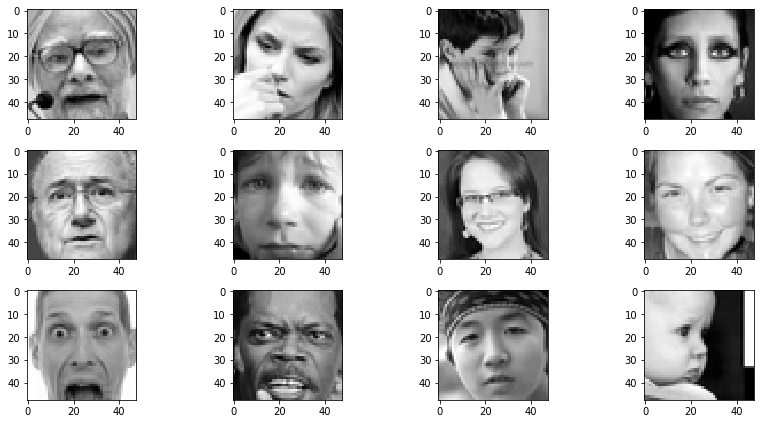

In [21]:
import seaborn as sns
plt.figure(0,figsize=(12,6))
for i in range(1,13):
    plt.subplot(3,4,i)
    plt.imshow(x_train[i,:,:,0],cmap='gray')

plt.tight_layout()
plt.show()

## 모델만들기

In [22]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

In [ ]:
def mymodel(width,height,depth):